<a href="https://colab.research.google.com/github/sp3nat/ML-DZ-SPESHILOV/blob/main/%D0%A1%D0%BF%D0%B5%D1%88%D0%B8%D0%BB%D0%BE%D0%B2_%D0%94%D0%97_6_%D0%AD_2209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

**Гипотеза компактности (для классификации)**:
Близкие объекты, как правило, лежат в одном классе.

**Гипотеза непрерывности (для регрессии)**: Близким
объектам соответствуют близкие ответы.

Метод k ближайших соседей (kNN — k nearest neighbours) метрический алгоритм для классификации объектов, основанный на оценивании сходства объектов.
Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Алгоритм:

1 Вычислить расстояние до каждого из объектов обучающей выборки

2 Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально

3 Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

**Достоинства:**
* Простота реализации.
* Классификацию, проведенную алгоритмом, легко интерпретировать путем предъявления пользователю нескольких ближайших объектов.

**Недостатки:**
* Необходимость хранения обучающей выборки целиком.
* Поиск ближайшего соседа предполагает сравнение классифицируемого объекта со всеми объектами выборки

**Выбор $k$**

Малые значения $k$ приведут к тому, что “шум” (выбросы) будет существенно влиять на результаты.

Большие значения усложняют вычисления и искажают логику ближайших соседей, в соответствии с которой ближайшие точки могут принадлежать
одному классу (гипотеза компактности).

Эвристика: $k=\sqrt n$

# Пример использования

In [2]:
url='https://drive.google.com/file/d/1fxO-zxmRcz7CTlN8o55ahqGttUfxRkiI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                 random_state=42, stratify=y)

In [6]:
param_grid = dict(n_neighbors=np.arange(1, 3 * int(np.ceil(np.sqrt(len(X_train[0]))))))
print(param_grid)

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])}


In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             scoring='accuracy')

In [9]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.69460784 0.71368778 0.67899698 0.7061086  0.69826546 0.70987934
 0.71772247 0.70422323]


Text(0, 0.5, 'Cross-Validated Accuracy')

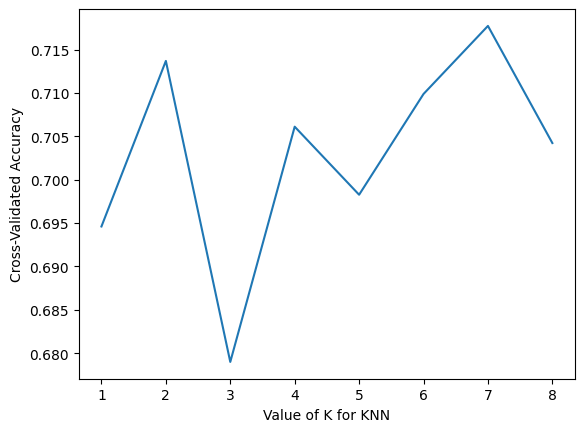

In [10]:
plt.plot(param_grid['n_neighbors'], grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [11]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7177224736048264
{'n_neighbors': np.int64(7)}
KNeighborsClassifier(n_neighbors=np.int64(7))


# Задание
Реализовать самостоятельно метод классификации kNN, где использовалась бы метрика Евклидового расстояния, $k=2$.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = 'https://drive.google.com/file/d/1fxO-zxmRcz7CTlN8o55ahqGttUfxRkiI/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# 1 Подготовка признаков
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# 2 Разбиение на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33,
    random_state=42,
    stratify=y
)

# 3 Реализация kNN (k=2, евклидово расстояние)
def euclidean_distance(a: np.ndarray, b: np.ndarray) -> float:
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train: np.ndarray,
                y_train: np.ndarray,
                x: np.ndarray,
                k: int = 2) -> int:
    # вычисляем расстояния до всех объектов train
    distances = np.array([euclidean_distance(x, xi) for xi in X_train])
    # мндексы k ближайших
    neigh_idx = np.argsort(distances)[:k]
    # Ввыбираем наиболее частый класс среди соседей
    counts = np.bincount(y_train[neigh_idx])
    return np.argmax(counts)

# 4 предсказание на тестовой выборке
y_pred = np.array([knn_predict(X_train, y_train, x_i, k=2) for x_i in X_test])

# 5 вывод
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy (k=2): {acc:.4f}\n')

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy (k=2): 0.7087

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       165
           1       0.65      0.37      0.47        89

    accuracy                           0.71       254
   macro avg       0.69      0.63      0.64       254
weighted avg       0.70      0.71      0.68       254

Confusion matrix:
[[147  18]
 [ 56  33]]
